In [98]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [99]:
def hash_func(a, b, p, n_buckets, x):
    y = x % p 
    hash_val = (a * y + b) % p 
    return hash_val % n_buckets

In [100]:
def calculate_error(est_count, count):
    word_frequence = list()
    relative_error = list()
    for key, value in count.items():
        temp_list = list()
        for j, hash_result in enumerate(est_count):
            a = hash_parms[j][0]
            b = hash_parms[j][1]
            hash_val = hash_func(a, b, p, n_buckets, key)
            temp_list.append(hash_result[hash_val])
        word_frequence.append(float(value/stream_len))
        relative_error.append(float((min(temp_list)-value)/value))
    
    fig, ax = plt.subplots()
    ax.plot(word_frequence, relative_error, 'o')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('word frequence')
    ax.set_ylabel('relative error')
    plt.show()

In [101]:
p = 123457
epsilon = math.e * 0.0001
n_buckets = int(math.ceil((math.e/epsilon)))
hash_num = 5
document_len = 196432300

stream_file = 'words_stream.txt'
count_file = 'counts.txt'
hash_file = 'hash_params.txt'

In [102]:
hash_parms = list()
with open(hash_file) as f:
    for line in f:
        a, b = line.split()
        hash_parms.append((int(a), int(b)))

In [103]:
with open(count_file) as f:
    count_dict = dict()
    for line in f:
        num, counts = line.split()
        count_dict[int(num)] = int(counts)

In [104]:
est_count = [dict() for _ in range(hash_num)]

stream_len = 0
with open(stream_file) as f:
    for line in f:
        num = int(line.strip())
        stream_len += 1
        if stream_len % 50000 == 0:
            print('{}/{}'.format(stream_len, document_len))
            clear_output(wait=True)
        for j in range(hash_num):
            a = hash_parms[j][0]
            b = hash_parms[j][1]
            hash_val = hash_func(a, b, p, n_buckets, num)
            if hash_val not in est_count[j]:
                est_count[j][hash_val] = 1
            else:
                est_count[j][hash_val] += 1         

196400000/196432300


<IPython.core.display.Javascript object>


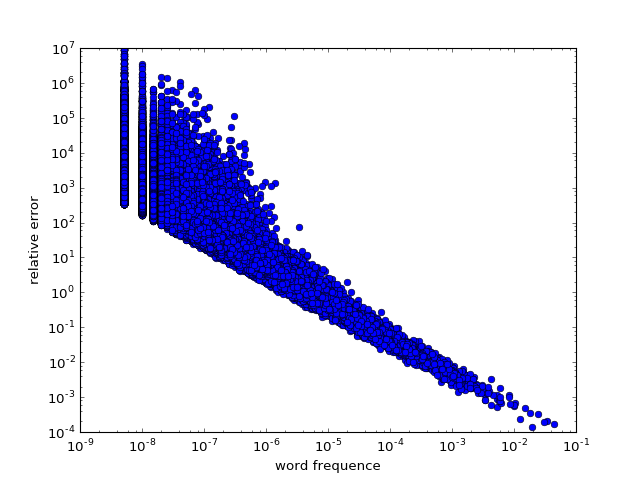

In [105]:
calculate_error(est_count, count_dict)